<b> Predict house prices </b>
Below is a table containing house prices. The price dependents on area (square feet), bedrooms, and the age of the home (in years). Given these prices we have to build a model to predict prices of new homes base don area, bedrooms and age.

<table>
    <tr>
        <th>Area</th>
        <th>Bedrooms</th>
        <th>Age</th>
        <th>Price</th>
    </tr>
    <tr>
        <td>2600</td>
        <td>3</td>
        <td>20</td>
        <td>550000</td>
    </tr>
    <tr>
        <td>3000</td>
        <td>4</td>
        <td>15</td>
        <td>565000</td>
    </tr>
    <tr>
        <td>3200</td>
        <td></td>
        <td>18</td>
        <td>610000</td>
    </tr>
    <tr>
        <td>3600</td>
        <td>3</td>
        <td>30</td>
        <td>595000</td>
    </tr>
    <tr>
        <td>4000</td>
        <td>5</td>
        <td>8</td>
        <td>760000</td>
    </tr>
    <tr>
        <td>4100</td>
        <td>6</td>
        <td>8</td>
        <td>810000</td>
    </tr>
</table>

Given these home prices find out the price of a home that is:
- 3000 sqft, 3 bed, 40 years old
- 2500 sqft, 4 bed, 5 year old

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
df = pd.read_excel('House_Prices.xlsx')
df

,Area,Bedrooms,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [3]:
df.Bedrooms.median()

4.0

In [4]:
df.Bedrooms = df.Bedrooms.fillna(df.Bedrooms.median())
df


,Area,Bedrooms,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


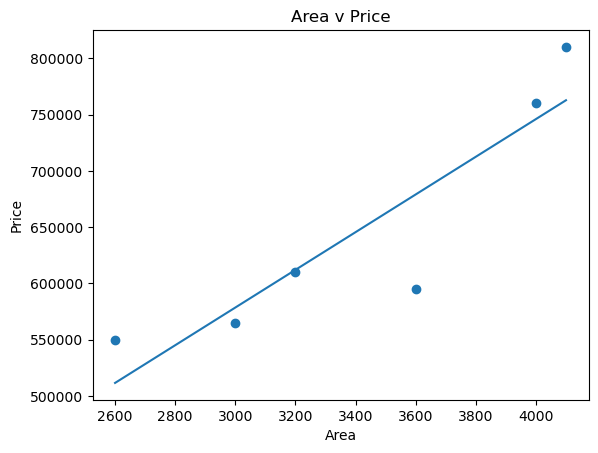

In [5]:
from matplotlib import pyplot as plt
plt.title("Area v Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(df.Area, df.Price)
plt.plot(np.unique(df.Area), np.poly1d(np.polyfit(df.Area, df.Price, 1))(np.unique(df.Area)))

In [6]:
from scipy.stats import pearsonr
corr = pearsonr(df.Area, df.Price)
print(corr)

PearsonRResult(statistic=0.9014764293346451, pvalue=0.01408216203765192)


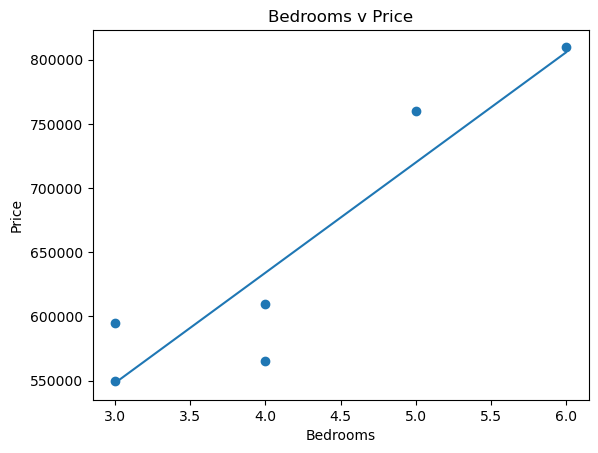

In [7]:
plt.title("Bedrooms v Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.scatter(df.Bedrooms, df.Price)
plt.plot(np.unique(df.Bedrooms), np.poly1d(np.polyfit(df.Bedrooms, df.Price, 1))(np.unique(df.Bedrooms)))

In [8]:
corr = pearsonr(df.Bedrooms, df.Price)
print(corr)

PearsonRResult(statistic=0.9198033987813916, pvalue=0.009389350256781892)


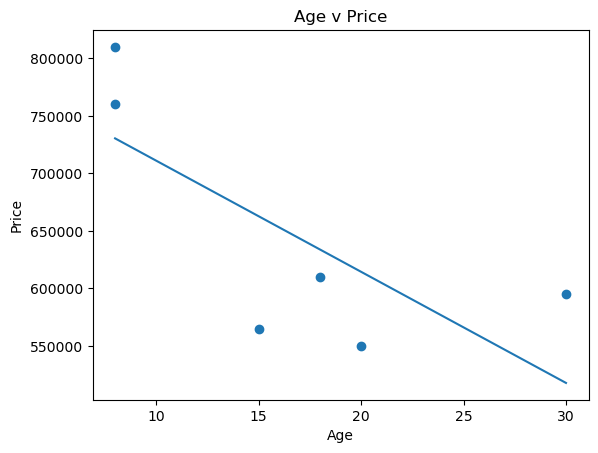

In [9]:
plt.title("Age v Price")
plt.xlabel("Age")
plt.ylabel("Price")
plt.scatter(df.Age, df.Price)
plt.plot(np.unique(df.Age), np.poly1d(np.polyfit(df.Age, df.Price, 1))(np.unique(df.Age)))

In [10]:
corr = pearsonr(df.Age, df.Price)
print(corr)

PearsonRResult(statistic=-0.7341665833688786, pvalue=0.09660822918598945)


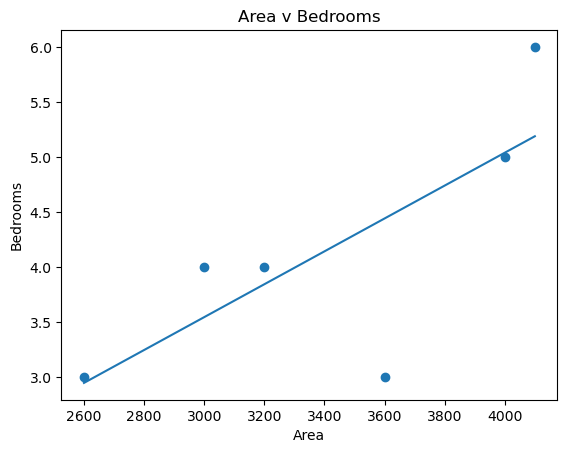

In [11]:
plt.title("Area v Bedrooms")
plt.xlabel("Area")
plt.ylabel("Bedrooms")
plt.scatter(df.Area, df.Bedrooms)
plt.plot(np.unique(df.Area), np.poly1d(np.polyfit(df.Area, df.Bedrooms, 1))(np.unique(df.Area)))

In [12]:
corr = pearsonr(df.Area, df.Bedrooms)
print(corr)

PearsonRResult(statistic=0.751710110621704, pvalue=0.08481853244322832)


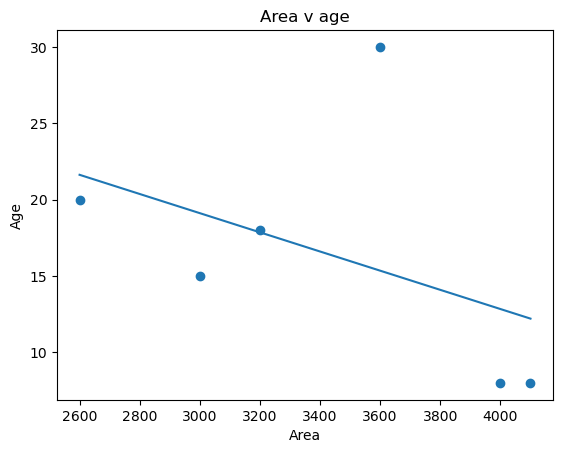

In [13]:
plt.title("Area v age")
plt.xlabel("Area")
plt.ylabel("Age")
plt.scatter(df.Area, df.Age)
plt.plot(np.unique(df.Area), np.poly1d(np.polyfit(df.Area, df.Age, 1))(np.unique(df.Area)))

In [14]:
corr = pearsonr(df.Area, df.Age)
print(corr)

PearsonRResult(statistic=-0.44529991730915874, pvalue=0.3761998332793568)


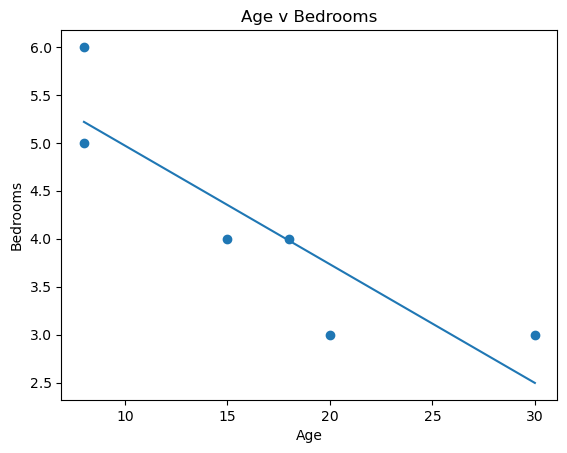

In [15]:
plt.title("Age v Bedrooms")
plt.xlabel("Age")
plt.ylabel("Bedrooms")
plt.scatter(df.Age, df.Bedrooms)
plt.plot(np.unique(df.Age), np.poly1d(np.polyfit(df.Age, df.Bedrooms, 1))(np.unique(df.Age)))

In [16]:
corr = pearsonr(df.Age, df.Bedrooms)
print(corr)

PearsonRResult(statistic=-0.8772214774517983, pvalue=0.021686431952520988)


In [17]:
import statsmodels.api as sm


In [18]:
data = list(zip(df.Area, df.Age))

In [19]:
data = sm.add_constant(data)
model = sm.OLS(df.Price, data)
result = model.fit()
print(result.summary())
# Next line gives the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     28.96
Date:                Fri, 21 Feb 2025   Prob (F-statistic):             0.0109
Time:                        13:09:01   Log-Likelihood:                -68.535
No. Observations:                   6   AIC:                             143.1
Df Residuals:                       3   BIC:                             142.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.84e+05   1.09e+05      2.607      0.0

C:\Users\johnl\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from word2number import w2n

In [21]:
!pip install word2number

In [22]:
from word2number import w2n

In [23]:
df = pd.read_excel("Salaries.xlsx")

In [24]:
df


,Experience,Test Score (out of 10),InterviewScore(out of 10),Salary ($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,Five,6.0,7,60000
3,Two,10.0,10,65000
4,Seven,9.0,6,70000
5,Three,7.0,10,62000
6,Ten,NaN,7,72000
7,Eleven,7.0,8,80000


In [25]:
df.Experience = df.Experience.fillna("Zero")

In [26]:
df

,Experience,Test Score (out of 10),InterviewScore(out of 10),Salary ($)
0,Zero,8.0,9,50000
1,Zero,8.0,6,45000
2,Five,6.0,7,60000
3,Two,10.0,10,65000
4,Seven,9.0,6,70000
5,Three,7.0,10,62000
6,Ten,NaN,7,72000
7,Eleven,7.0,8,80000


In [27]:
df.Experience = df.Experience.apply(w2n.word_to_num)

In [28]:
df

,Experience,Test Score (out of 10),InterviewScore(out of 10),Salary ($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [29]:
import math
test_score_average = math.floor(df['Test Score (out of 10)'].mean())


In [30]:
test_score_average

7

In [33]:
df["Test Score (out of 10)"] = df["Test Score (out of 10)"].fillna(test_score_average)

In [34]:
df

,Experience,Test Score (out of 10),InterviewScore(out of 10),Salary ($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


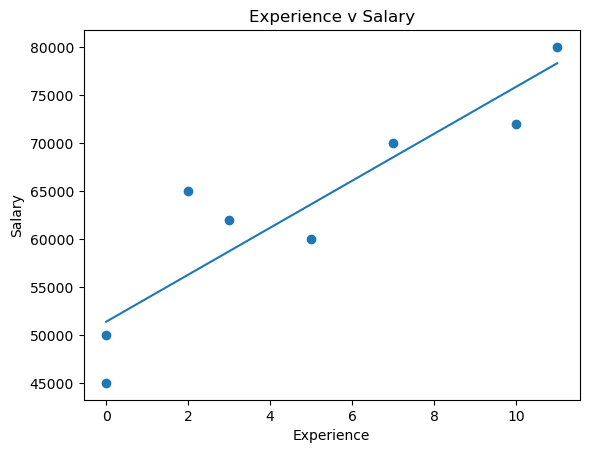

In [35]:
plt.title("Experience v Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.scatter(df.Experience, df["Salary ($)"])
plt.plot(np.unique(df.Experience), np.poly1d(np.polyfit(df.Experience, df["Salary ($)"], 1))(np.unique(df.Experience)))

In [37]:
corr = pearsonr(df.Experience, df["Salary ($)"])
print(corr)

PearsonRResult(statistic=0.908017060180008, pvalue=0.001813882412031107)


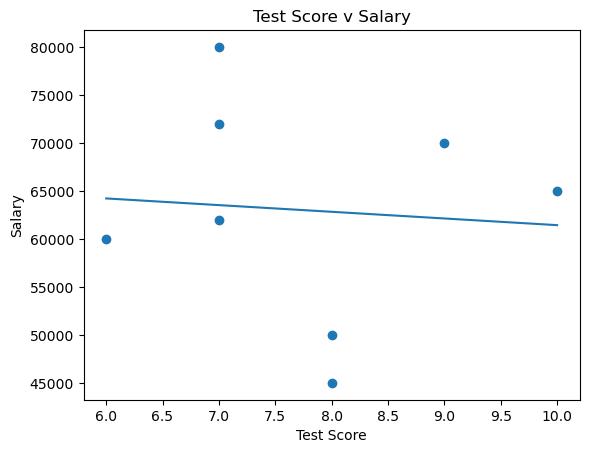

In [38]:
plt.title("Test Score v Salary")
plt.xlabel("Test Score")
plt.ylabel("Salary")
plt.scatter(df["Test Score (out of 10)"], df["Salary ($)"])
plt.plot(np.unique(df["Test Score (out of 10)"]), np.poly1d(np.polyfit(df["Test Score (out of 10)"], df["Salary ($)"], 1))(np.unique(df["Test Score (out of 10)"])))

In [39]:
corr = pearsonr(df["Test Score (out of 10)"], df["Salary ($)"])
print(corr)

PearsonRResult(statistic=-0.07752389300267237, pvalue=0.8552240443592602)


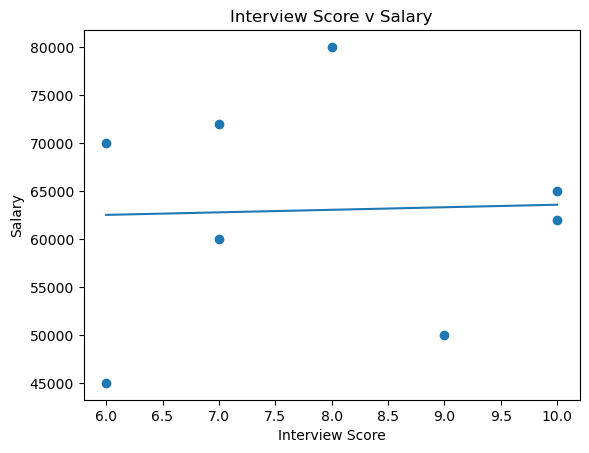

In [40]:
plt.title("Interview Score v Salary")
plt.xlabel("Interview Score")
plt.ylabel("Salary")
plt.scatter(df["InterviewScore(out of 10)"], df["Salary ($)"])
plt.plot(np.unique(df["InterviewScore(out of 10)"]), np.poly1d(np.polyfit(df["InterviewScore(out of 10)"], df["Salary ($)"], 1))(np.unique(df["InterviewScore(out of 10)"])))

In [41]:
corr = pearsonr(df["InterviewScore(out of 10)"], df["Salary ($)"])
print(corr)

PearsonRResult(statistic=0.037819957009852384, pvalue=0.9291551712697206)


In [42]:
data = sm.add_constant(df.Experience)
model = sm.OLS(df["Salary ($)"], data)
result = model.fit()
print(result.summary())
# Next line gives the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:             Salary ($)   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     28.19
Date:                Fri, 21 Feb 2025   Prob (F-statistic):            0.00181
Time:                        13:23:24   Log-Likelihood:                -78.659
No. Observations:                   8   AIC:                             161.3
Df Residuals:                       6   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.138e+04   2859.894     17.964      0.0

C:\Users\johnl\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


In [44]:
data = list(zip(df.Experience, df["Test Score (out of 10)"], df["InterviewScore(out of 10)"]))
data = sm.add_constant(data)
model = sm.OLS(df["Salary ($)"], data)
result = model.fit()
print(result.summary())
# Next line gives the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:             Salary ($)   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     56.67
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           0.000983
Time:                        13:30:22   Log-Likelihood:                -70.528
No. Observations:                   8   AIC:                             149.1
Df Residuals:                       4   BIC:                             149.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.499e+04   7386.210      2.030      0.1

C:\Users\johnl\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


In [45]:
import pandas as pd

In [46]:
df = pd.read_csv("weight-height.csv")

In [47]:
df


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [48]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

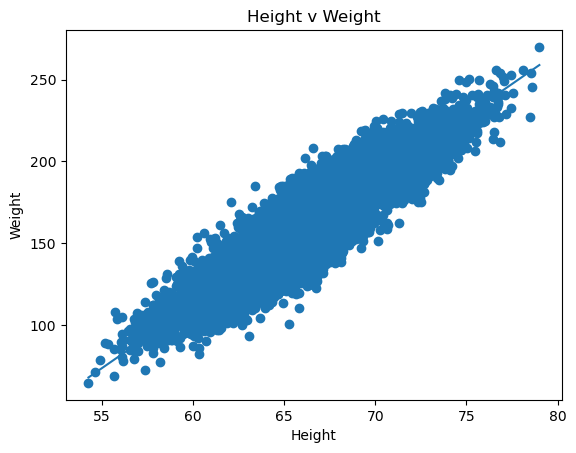

In [49]:
from matplotlib import pyplot as plt
plt.title("Height v Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.scatter(df.Height, df.Weight)
plt.plot(np.unique(df.Height), np.poly1d(np.polyfit(df.Height, df.Weight, 1))(np.unique(df.Height)))